In [1]:
import pandas as pd
import numpy as np

### data

In [6]:
ratings_df = pd.read_csv('D:/기타자료/AI 스터디/기타/data/ml-latest-small/ratings.csv', encoding='utf8')
tags_df = pd.read_csv('D:/기타자료/AI 스터디/기타/data/ml-latest-small/tags.csv', encoding='utf8')
movies_df = pd.read_csv('D:/기타자료/AI 스터디/기타/data/ml-latest-small/movies.csv', encoding='utf8', index_col='movieId')

In [7]:
ratings_df.head()
# timestamp: 평점을 기록한 시간을 의미

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [9]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


### 평점 데이터의 기초 통계량

In [24]:
n_unique_users = len(ratings_df['userId'].unique())
print('n_unique_users:', n_unique_users)

n_unique_movies = len(ratings_df['movieId'].unique())
print('n_unique_movies:', n_unique_movies)

print(f'>> {n_unique_users}명의 유저가 총 {n_unique_movies}개의 영화에 대해서 평점을 내렸다.')

n_unique_users: 610
n_unique_movies: 9724
>> 610명의 유저가 총 9724개의 영화에 대해서 평점을 내렸다.


In [26]:
print(f">> 평점의 평균은 {ratings_df['rating'].mean()}이고, 평점의 표준편차는 {ratings_df['rating'].std()}이다.")

>> 평점의 평균은 3.501556983616962이고, 평점의 표준편차는 1.042529239060635이다.


In [27]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [28]:
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<Axes: title={'center': 'userId'}>,
        <Axes: title={'center': 'movieId'}>],
       [<Axes: title={'center': 'rating'}>, <Axes: >]], dtype=object)

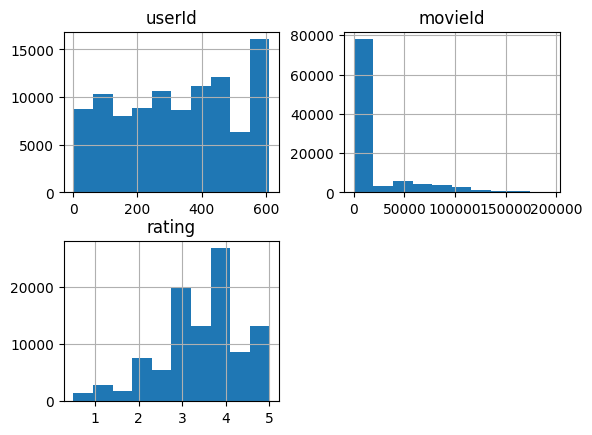

In [29]:
ratings_df[['userId','movieId','rating']].hist()

In [31]:
ratings_df.groupby(by=['userId','rating']).size()
print(f">> 예를 들어서, userId가 1인 사람은 평점 1점을 많이 주지 않았고, 5점을 많이 줬다.")
print(f">> 반면에, userId가 610인 사람은 평점을 골고루 주었다.")

>> 예를 들어서, userId가 1인 사람은 평점 1점을 많이 주지 않았고, 5점을 많이 줬다.
>> 반면에, userId가 610인 사람은 평점을 골고루 주었다.
